<a href="https://colab.research.google.com/github/brendenwest/cis276/blob/main/4_statistical_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization

### Reading

- Murach's, Chapter 4?
- https://seaborn.pydata.org/tutorial/introduction.html

### Learning Outcomes

- making plots with seaborn



### Plotting with seaborn

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn not only makes it easier than pandas to prepare a wider variety of plots, but supports enhancements for presentation-quality plots.



Seaborn supports several key types of plots:

- **relational** - show the relationship between two numeric variables. Includes scatter plots and line plots
- **categorical** - compare data in different categories
- **distribution** - examine how numeric data is distributed across a range of values. Types of distribution plots are histogram, kernel density estimate (KDE) plot, and empirical cumulative distribution function (ECDF) plot
- **predictive** - plots that are designed for predictive analysis, such as for linear regression models.

In [11]:
import pandas as pd
# get example data
url = "https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD" 
mortality_data = pd.read_csv(url)

# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

#### Seaborn styles

`set_style(style)` 
Sets the background style with one of these values: `darkgrid`, `whitegrid`, `dark`, `white`, and `ticks` (the default). This style stays in effect until it is changed by another set_style() call.

#### General vs. specific methods

You can create Seaborn plots using the general `relplot()` command, which expects a `kind` parameter.

Alternatively, you can use a specific method - e.g. `lineplot()`, which does not require a `kind` parameter.

The two approaches mostly produce the same result, but the the general methods let you create plots with subplots, while the specific methods don’t.

So the general methods return a `FacetGrid` object that contains an `Axes` object for each subplot. The specific methods return an `Axes` object.

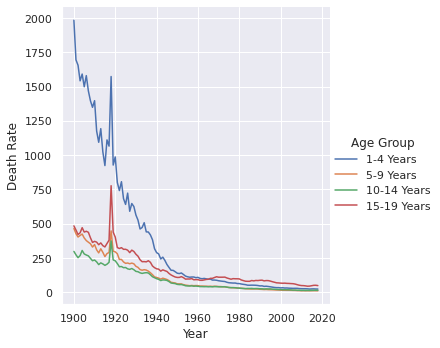

In [12]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='Death Rate', hue='Age Group')

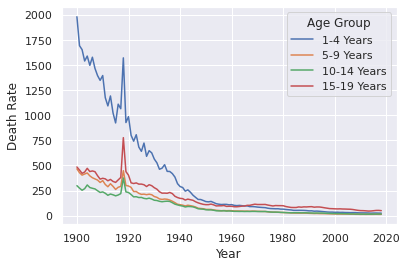

In [13]:
sns.lineplot(data=mortality_data, x='Year', y='Death Rate', hue='Age Group')


#### Basic Seaborn plot parameters

- data - the DataFrame of data to plot
- kind - the type of plot (general plots only)
- x, y - data columns for the x- and y-axis
- hue -  the column that determines categories to plot, with different color for each category
- palette -  color pallette for the plot
- height - The height of the plot in inches with a default of 5. (general plots only)
- aspect - the ratio of width to height (general plots only)
- legend - options for how the legend will be drawn: `auto` (the default), `brief`, `full`, and `False`. (general plots only)



#### Creating subplots

- By default, x and y labels are shared by subplots
- subplots get their title from the category label


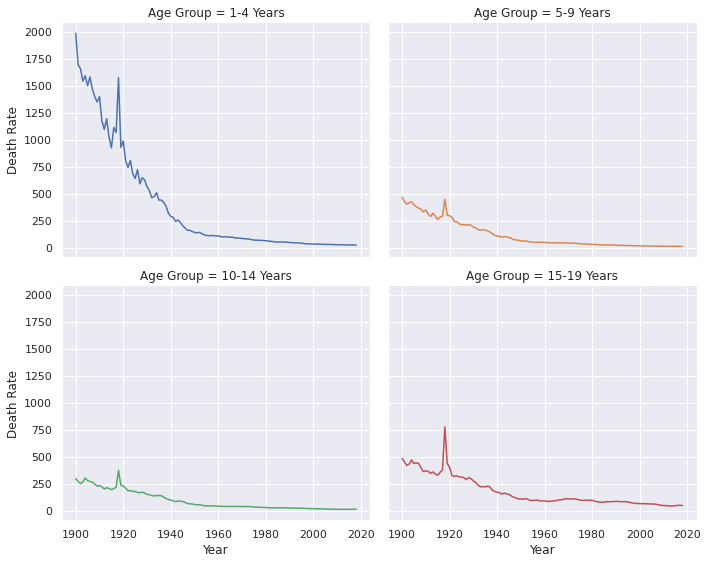

In [16]:
sns.relplot(data=mortality_data, kind='line', x='Year', y='Death Rate', hue='Age Group', height=4, aspect=1.25,
col='Age Group', col_wrap=2, legend=False) 

#### Modifying plot features

The `Axes` object that provides methods for enhancing a plot.

[Text(0, 0.5, 'Deaths per 100,000'), Text(0.5, 1.0, 'Deaths by Age Group')]

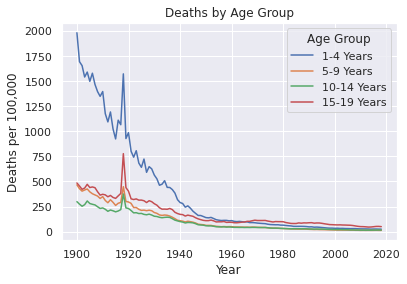

In [18]:
ax = sns.lineplot(data=mortality_data, x='Year', y='Death Rate', hue='Age Group') 
ax.set(title='Deaths by Age Group', ylabel='Deaths per 100,000')

#### Saving plots

Seaborn plots can be saved to PNG, SVG, or PDF files. The approach is slightly different for plots created with general or specific methods.

- **General method** - assign the plot's FacetGrid object to a variable and then use the `savefig()` method of the FacetGrid object 
- **Specific method** - call the `get_figure()` method on the Axes object  returned by the lineplot() method, then chain go the `savefig()` method

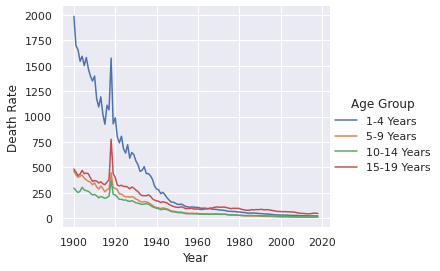

In [19]:
g = sns.relplot(data=mortality_data, kind='line', x='Year', y='Death Rate', hue='Age Group')
g.fig.subplots_adjust(bottom=0.35) # adjust the bottom to fix the y labels g.savefig('lineChart.png') 
g.savefig('lineChart.svg') 

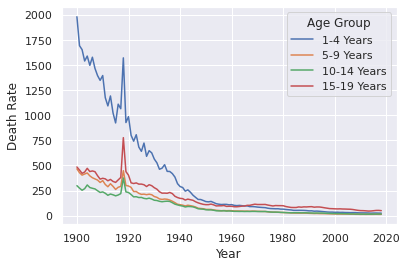

In [20]:
ax = sns.lineplot(data=mortality_data,
x='Year', y='Death Rate', hue='Age Group')
ax.get_figure().savefig('lineChart.png') 

### Distribution plots 

Seaborn provides a density plot, based on kernel densitiy estimate (`KDE`) that represents the probability of a datapoint occurring at a certain x value.

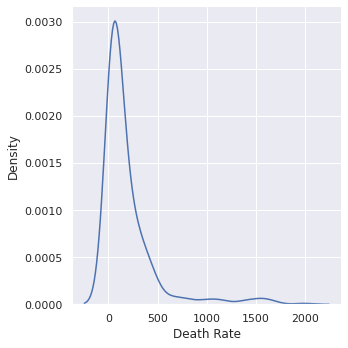

In [21]:
sns.displot(data=mortality_data, kind='kde', x='Death Rate') 

Density plots can be combined with histograms.

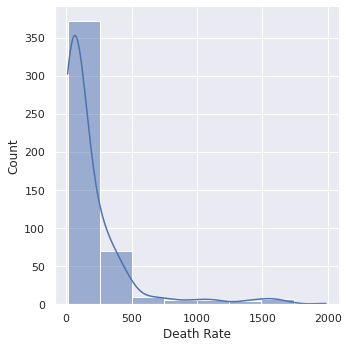

In [22]:
sns.displot(data=mortality_data, kind='hist', x='Death Rate', kde=True, bins=8)